In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv("DataShort.csv",sep=' ',parse_dates=['purchase_dt'])

In [3]:
df.head(5)

,sample_data,acct_num_share,issr_code_numb,product_nm,funding_source,mrch_country_nm,f2f_ecomm_flg,pos_cash_flg,rub_amt,purchase_dt,mrch_category_01,mrch_category_02,mrch_category_03,mrch_category_04
0,TRAIN_SHARED,604ee6361f8a853c947ede4e3c9da372,3,VISA REWARDS,D,RUSSIAN FEDERATION,FACE-TO-FACE,POS,811.0,2018-09-19,GROCERY STORES/SUPERMARKETS,SUPERMARKETS,FOOD & DRUG,FOOD & GROCERY
1,TRAIN_SHARED,604ee6361f8a853c947ede4e3c9da372,3,VISA REWARDS,D,RUSSIAN FEDERATION,FACE-TO-FACE,POS,175.0,2018-03-19,SERVICE STATIONS,FUEL/SERVICE STATION,FUEL,FUEL
2,TRAIN_SHARED,604ee6361f8a853c947ede4e3c9da372,3,VISA REWARDS,D,RUSSIAN FEDERATION,FACE-TO-FACE,POS,1367.0,2017-03-12,STATIONERY STORES,LEISURE GOODS RETAIL,RETAIL GOODS,RETAIL GOODS
3,TRAIN_SHARED,604ee6361f8a853c947ede4e3c9da372,3,VISA REWARDS,D,RUSSIAN FEDERATION,FACE-TO-FACE,POS,6427.0,2017-03-12,SPORTING GOODS STORES,SPORTING GOODS RETAIL,RETAIL GOODS,RETAIL GOODS
4,TRAIN_SHARED,604ee6361f8a853c947ede4e3c9da372,3,VISA REWARDS,D,RUSSIAN FEDERATION,FACE-TO-FACE,POS,284.0,2018-06-19,MISC FOOD STORES - DEFAULT,FOOD RETAIL,FOOD & DRUG,FOOD & GROCERY


In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 47036 to 14689
Data columns (total 11 columns):
acct_num_share      100000 non-null object
issr_code_numb      100000 non-null int64
product_nm          100000 non-null object
funding_source      100000 non-null object
mrch_country_nm     100000 non-null object
f2f_ecomm_flg       100000 non-null object
pos_cash_flg        100000 non-null object
rub_amt             100000 non-null float64
purchase_dt         100000 non-null datetime64[ns]
mrch_category_03    100000 non-null object
day_numb            100000 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(2), object(7)
memory usage: 11.7+ MB


### 1. Смотрим на данные 

Данные - это логи транзакций по картам 170 человек за два года

Колонка sample_data вся одинаковая, просто говорит, что это трейн

In [4]:
df['sample_data'].unique()

array(['TRAIN_SHARED'], dtype=object)

Колонка acct_num_share - это уникальный номер карнты человека
Их всего 170

In [5]:
df['acct_num_share'].nunique()

170

Колонка issr_code_numb - это тип карты Их всего 15

In [6]:
df['issr_code_numb'].nunique()

15

Колонка product_nm - это тип карты Их всего 7

In [7]:
df['product_nm'].unique()

array(['VISA REWARDS', 'VISA SIGNATURE', 'VISA PLATINUM', 'VISA CLASSIC',
       'VISA GOLD', 'VISA ELECTRON', 'VISA INFINITE'], dtype=object)

Колонка funding_source - это тип карты, дебетовая/кредитная

In [8]:
df['funding_source'].unique()

array(['D', 'C'], dtype=object)

Колонка  mrch_country_nm - это страна, в которой была совершена покупка

In [9]:
df['mrch_country_nm'].nunique()

80

Колонка f2f_ecomm_flg - это тип покупки, лично или по интернету

In [10]:
df['f2f_ecomm_flg'].unique()

array(['FACE-TO-FACE', 'E-COMM'], dtype=object)

Колонка pos_cash_flg - это тип покупки, картой или наличными

In [11]:
df['pos_cash_flg'].unique()

array(['POS', 'CASH'], dtype=object)

Колонка rub_amt - это сумма покупки в рублях

In [12]:
print(df['rub_amt'].min())
print(df['rub_amt'].max())

2.0
1237383.0


Колонка purchase_dt - это дата покупки

In [14]:
print(df['purchase_dt'].min())
print(df['purchase_dt'].max())

2016-10-01 00:00:00
2018-09-29 00:00:00


Колонки mrch_category_01, mrch_category_02, mrch_category_03, mrch_category_04
- это категории покупок, группы от очень узких разделений до более общих

In [17]:
print(df['mrch_category_01'].nunique())
print(df['mrch_category_02'].nunique())
print(df['mrch_category_03'].nunique())
print(df['mrch_category_04'].nunique())

220
52
14
27


Как видим, дропнуть можно только колонку sample_data, потому что там одно и то же

In [18]:
df.drop(columns=['sample_data'],inplace=True)

Еще можно из категрий покупок оставить только самую общую, 
потому что 14 категорий нам в самый раз, а 220 слишком много

In [19]:
df.drop(columns=['mrch_category_01','mrch_category_02','mrch_category_04'],inplace=True)

Еще создадим словарь, сопоставляющий дате порядковый номер этой даты, начиная с начала наблюдений

In [46]:
num2days = dict(enumerate(sorted(list(set(df['purchase_dt'])))))
days2num = {v: k for k, v in num_days.items()}

df['day_numb']=list(map(lambda x: days2num[x], df['purchase_dt']))

И еще отсортируем таблицу по возрастанию дат

In [47]:
df=df.sort_values(by=['purchase_dt'])

In [48]:
df.head(5)

,acct_num_share,issr_code_numb,product_nm,funding_source,mrch_country_nm,f2f_ecomm_flg,pos_cash_flg,rub_amt,purchase_dt,mrch_category_03,day_numb
47036,53cdd4182f8d7e4b71e9b598f46f814b,12,VISA CLASSIC,C,UNITED KINGDOM,E-COMM,POS,3518.0,2016-10-01,RETAIL GOODS,0
121,eb21cc0143d96dbc8e3a58f1a81e4dd2,3,VISA REWARDS,D,RUSSIAN FEDERATION,FACE-TO-FACE,POS,2823.0,2016-10-01,HEALTH CARE,0
48383,428acaf1a8f380b1dd40e17c9f775860,12,VISA CLASSIC,C,NETHERLANDS,FACE-TO-FACE,POS,739.0,2016-10-01,RESTAURANT & QSR,0
71529,2f366fa81a29ac6035a8f478b3bf6ba1,12,VISA SIGNATURE,D,KAZAKHSTAN,E-COMM,POS,199.0,2016-10-01,TELECOM & UTIL & INS,0
71530,2f366fa81a29ac6035a8f478b3bf6ba1,12,VISA SIGNATURE,D,KAZAKHSTAN,E-COMM,POS,199.0,2016-10-01,TELECOM & UTIL & INS,0


### 2. Визуализация

Нарисуем средний чек в зависимости от дня
Причем одного и того же человека, если он в один день совершил 10 покупок, 
мы считаем 10 разными людьми, потому что поведение людей мы потом будем исследовать

In [69]:
tmp=pd.DataFrame(df.groupby(by='purchase_dt')['rub_amt'].mean())
tmp.head(2)

,rub_amt
purchase_dt,
2016-10-01,2158.226667
2016-10-02,3868.396825


Text(0, 0.5, 'Средний чек')

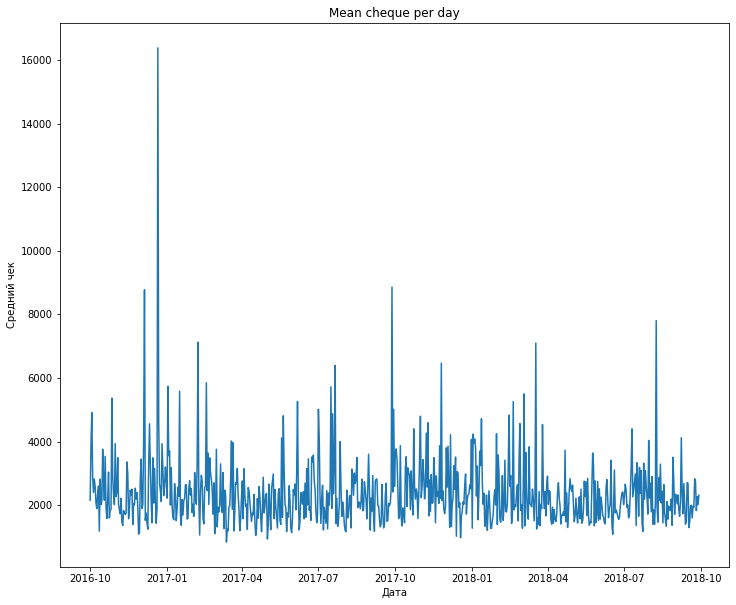

In [68]:
fig = plt.figure(figsize=(12, 10))

tmp=pd.DataFrame(df.groupby(by='purchase_dt')['rub_amt'].mean())

ax1 = plt.subplot(111)
ax1.plot(tmp.index,tmp['rub_amt'])
ax1.set_title("Mean cheque per day")
ax1.set_xlabel("Дата")
ax1.set_ylabel("Средний чек")


Видим, что пока ничего не понятно о поведении людей, хотя вроде на новогодние праздники пики есть

In [ ]:
Попробуем посмотреть, в какие периоды количество покупок было больше 

Text(0.5, 1.0, 'Сумма покупки от номера дня')

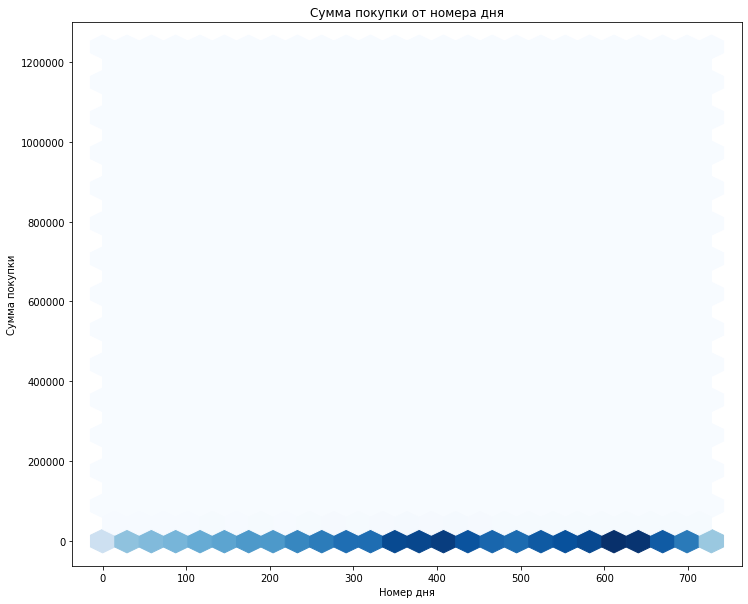

In [85]:
fig = plt.figure(figsize=(12, 10))

ax1 = plt.subplot(111)
ax1.hexbin(df['day_numb'],df['rub_amt'],gridsize = 25,cmap ='Blues')
ax1.set_xlabel("Номер дня")
ax1.set_ylabel("Сумма покупки")
ax1.set_title("Сумма покупки от номера дня")


In [90]:
print(num2days[350])
print(num2days[420])
print(num2days[600])
print(num2days[650])

2017-09-16 00:00:00
2017-11-25 00:00:00
2018-05-24 00:00:00
2018-07-13 00:00:00


Видим  тенденцию, что чаще покупают осенью и весной, чем на праздники зимой или на каникулах летом

Посмотрим, отличается ли средние суммы покупок в разных категориях карт

In [69]:
df_cards=pd.DataFrame(df.groupby(by='product_nm')['rub_amt'].mean())
df_cards

,rub_amt
product_nm,
VISA CLASSIC,2175.231064
VISA ELECTRON,883.109302
VISA GOLD,1719.752616
VISA INFINITE,11251.293292
VISA PLATINUM,2655.440256
VISA REWARDS,2321.657341
VISA SIGNATURE,3197.443476


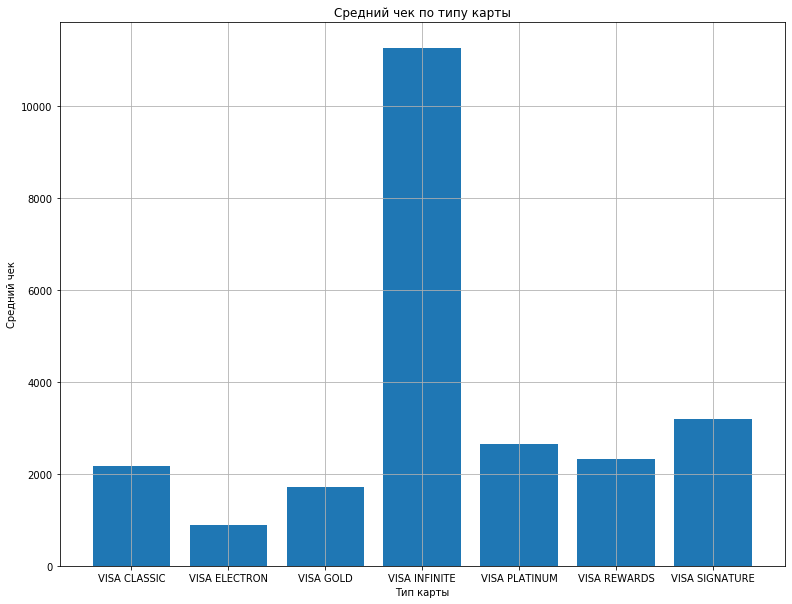

In [75]:
fig = plt.figure(figsize=(13, 10))


ax = plt.subplot(111)
ax.bar(df_cards.index,df_cards['rub_amt'])

ax.set_xlabel("Тип карты")
ax.set_ylabel("Средний чек")
ax.set_title("Средний чек по типу карты")
ax.grid()

Видим, что очень сильно отличается: самую простую карту (Visa Electron) мы легко отличим от самой крутой (Visa Infinite)

Теперь посмотрим на суммарные траты и средний чек в зависимости от категории покупки

In [108]:
tmp_sum=pd.DataFrame(df.groupby(by='mrch_category_03')['rub_amt'].sum())
tmp_mean=pd.DataFrame(df.groupby(by='mrch_category_03')['rub_amt'].mean())
tmp_sum

,rub_amt
mrch_category_03,
AUTOMOTIVE,6557393.0
BUSINESS TO BUSINESS,1303164.0
DEPARTMENT & APPAREL,32630324.0
EDUCATION & GOVERNMENT,2973072.0
ENTERTAINMENT,10148986.0
FOOD & DRUG,42737592.0
FUEL,6924781.0
HEALTH CARE,6831417.0
HOME IMPROVEMENT & SUPPLY,13441784.0


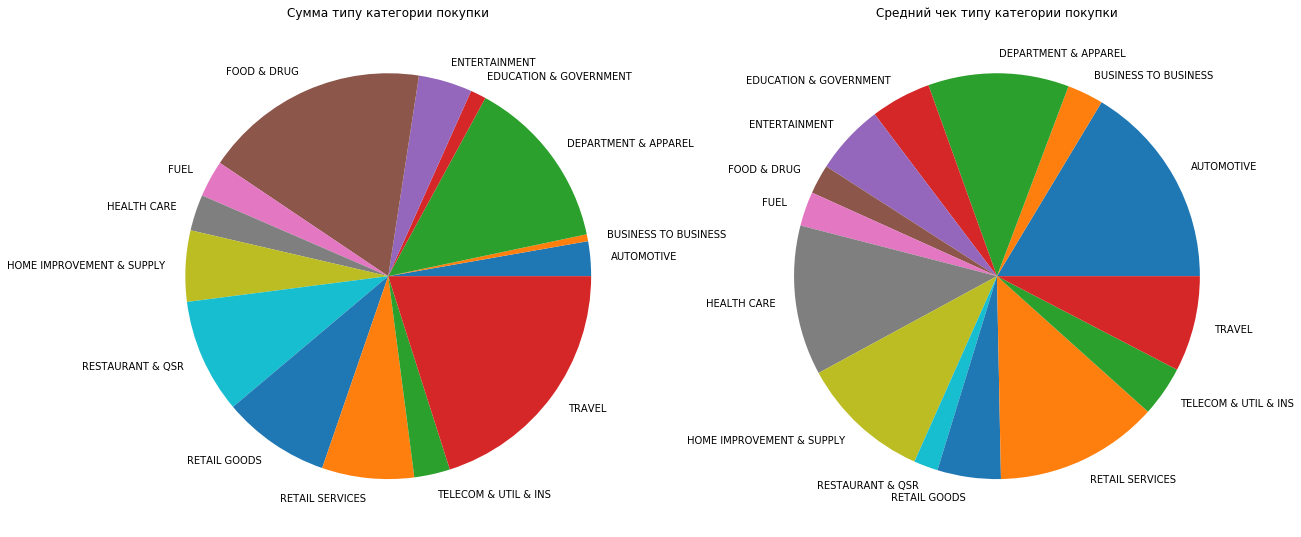

In [110]:
fig = plt.figure(figsize=(20, 10))


ax1 = plt.subplot(121)
ax1.pie(tmp_sum['rub_amt'],labels=tmp_sum.index)
ax1.set_title("Сумма типу категории покупки")


ax2 = plt.subplot(122)
ax2.pie(tmp_mean['rub_amt'],labels=tmp_mean.index)
ax2.set_title("Средний чек типу категории покупки")


ax.grid()

Мы видим, что польше всего зарабатывает индустрия еды и путешествий, 
но более дорогими являются услуги здравоохранения и обслуживания автомобилей

Теперь посмотрим на покупки отдельного человека на протяжении первого и второго года

In [111]:
df['acct_num_share'][0]

'604ee6361f8a853c947ede4e3c9da372'

In [147]:
df_person=df[df['acct_num_share']==df['acct_num_share'][0]]
dfp1=df_person[df_person['purchase_dt']<pd.Timestamp(year=2017, month=10, day=1)]
dfp2=df_person[df_person['purchase_dt']>=pd.Timestamp(year=2017, month=10, day=1)]
print(df_person.shape)
print(dfp1.shape)
print(dfp2.shape)

(54, 11)
(26, 11)
(28, 11)


Создадим массив с колличеством покупок в день

In [148]:
arr1 = np.zeros(len(days_num))
for row in dfp1.iterrows():
    arr1[row[1].day_numb] += 1

arr2 = np.zeros(len(days_num))
for row in dfp2.iterrows():
    arr2[row[1].day_numb] += 1


Text(0.5, 1.0, 'Количество покупок от даты')

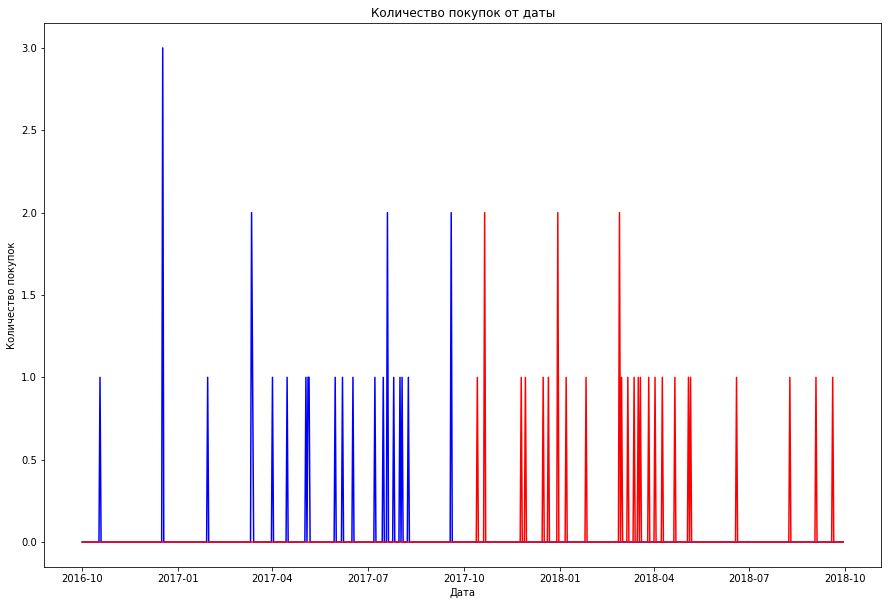

In [149]:
fig = plt.figure(figsize=(15, 10))


ax = plt.subplot(111)
ax.plot(list(k for k in days2num),arr1,c='blue')
ax.plot(list(k for k in days2num),arr2,c='r')

ax.set_xlabel("Дата")
ax.set_ylabel("Количество покупок")
ax.set_title("Количество покупок от даты")


Как-то не очень понятно, изменилось ли его поведение за год;
Вроде не изменилось
Будем проверять гипотезу об этом

### 3. Проверка гипотез

Проверим гипотезу, что среднее число покупок у этого человека в течение первого года и в течение второго года равны против двустронней альтернатвы

Поскольку это один и тот же человек, то выборки связаны

Используем параметрический критерий стьюдента для связанных выборок

In [139]:
import scipy
from scipy import stats

In [157]:
days2num[pd.Timestamp(year=2017, month=10, day=1)]

365

In [156]:
stats.ttest_rel(arr1[1:365], arr2[365:])

Ttest_relResult(statistic=-0.24967779339620566, pvalue=0.802977761284739)

Получили значение pvalue=0.80 > 0.05, поэтому нулевую гипотезу отвергнуть нельзя, 
то есть мы продолжаем верить, что человек оба года в среднем одинаково покупает

Теперь используем непараметрический критерий для проверки той же гипотезы

In [159]:
from statsmodels.stats.descriptivestats import sign_test

In [160]:
sign_test(arr1[1:365]- arr2[365:])

(-1.5, 0.7607916425613435)

Он выдал примерно то же самое, но с чуть меньшей уверенностью

А теперь для сравнения возьмем другого человека и посмотрим, изменилось ли его поведение;
то есть проверяем нулевую гипотезу о том, что его средний чек в первый и второй год одинаковы

In [161]:
df_person=df[df['acct_num_share']==df['acct_num_share'][100]]
dfp1=df_person[df_person['purchase_dt']<pd.Timestamp(year=2017, month=10, day=1)]
dfp2=df_person[df_person['purchase_dt']>=pd.Timestamp(year=2017, month=10, day=1)]
print(df_person.shape)
print(dfp1.shape)
print(dfp2.shape)

arr1 = np.zeros(len(days_num))
for row in dfp1.iterrows():
    arr1[row[1].day_numb] += 1

arr2 = np.zeros(len(days_num))
for row in dfp2.iterrows():
    arr2[row[1].day_numb] += 1



(722, 11)
(264, 11)
(458, 11)


Text(0.5, 1.0, 'Количество покупок от даты')

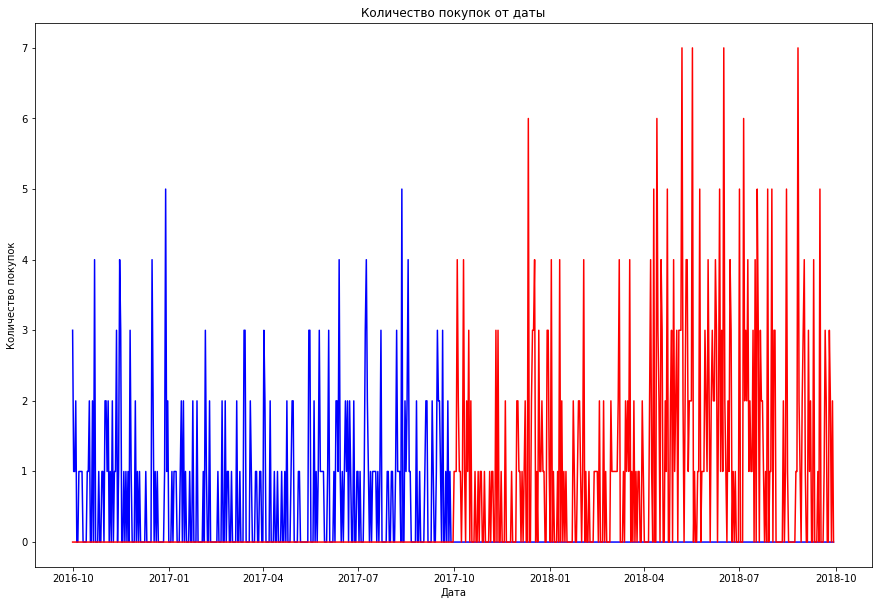

In [162]:
fig = plt.figure(figsize=(15, 10))


ax = plt.subplot(111)
ax.plot(list(k for k in days2num),arr1,c='blue')
ax.plot(list(k for k in days2num),arr2,c='r')

ax.set_xlabel("Дата")
ax.set_ylabel("Количество покупок")
ax.set_title("Количество покупок от даты")



Из графика видно, что этот человек явно во второй год больше покупает

Посмотрим, заметят ли это статистические тесты

In [166]:
stats.ttest_rel(arr1[1:365], arr2[365:])

Ttest_relResult(statistic=-5.563492580312589, pvalue=5.141379650895666e-08)

In [164]:
sign_test(arr1[1:365]- arr2[365:])

(-31.0, 0.00013645891810110423)

Заметили! Причем оба (хотя непараметрический и гораздо меньшей уверенностью)

Итак, мы получили pvalue <0.05, поэтому нулевую гипотезу о равенстве средних для этого человека в первый год и второй - отвергаем; то есть средние разные

### 4. Предсказание временного ряда

Возьмем этого нового человека с изменившимся поведением 
и попробуем на основе его графика числа покупок 
во второй год без последней недели предсказать его число покупок на последнюю неделю

In [169]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [223]:
train=arr2[365:-7]
test=arr2[-7:]
print(len(train))
test

357


array([3., 1., 2., 5., 2., 1., 1.])

In [224]:
model3 = ExponentialSmoothing(np.array(train).astype(float),seasonal_periods=7 ,trend='add', seasonal='add').fit()
forecast=np.round(model3.forecast(len(test)))

In [225]:
from sklearn.metrics import mean_squared_error

In [226]:
mean_squared_error(test,forecast)

2.4285714285714284

Ну вроде нормально предсказывает для одного человека

Теперь посмотрим, нормально ли предсказывает в среднем на всех людях

In [230]:
import warnings
warnings.filterwarnings('ignore')
from tqdm import tqdm

In [231]:
mas_err=[]
for card_id in tqdm(df['acct_num_share'].unique()):
    dfp=df[df['acct_num_share']==card_id]
    dfp2=dfp[dfp['purchase_dt']>=pd.Timestamp(year=2017, month=10, day=1)]
    
    arr2 = np.zeros(len(days_num))
    for row in dfp2.iterrows():
        arr2[row[1].day_numb] += 1
        
    train=arr2[365:-7]
    test=arr2[-7:]
    
    #model3 = Holt(np.array(train).astype(float)).fit()
    model3 = ExponentialSmoothing(np.array(train).astype(float),seasonal_periods=7 ,trend='add', seasonal='add').fit()
    forecast=np.round(model3.forecast(len(test)))
    tek_err=mean_squared_error(test,forecast)
    mas_err.append(tek_err)

100%|██████████| 170/170 [00:30<00:00,  4.22it/s]


In [232]:
np.array(mas_err).mean()

1.5512605042016807

Ну вроде тоже нормально

### 5. Выводы

Мы выяснили, что интенсивность покупок зависит от сезона, весной и осенью покупок больше, чем зимой и летом

Мы выяснили, что средний чек напрямую указывает, какого типа у человека карта (Electron или Infinite)

Мы выяснили, что больше всего денег люди тратят на еду и путешествия, в то время как самыми дорогими областями являются медицинские услуги и обслуживание автомобилей

Мы выяснили, что у некоторых людей средний чек не претерпел за год изменений, у некоторых вырос, и это можно понять, используя статистические тесты

Мы научились с помощью модели экспоненциального сглаживания довольно неплохо предсказывать количество покупок на следующую неделю, имея количества покупок за год для этого конктретного человека